<a href="https://colab.research.google.com/github/foxtrotmike/pakflag/blob/master/pakflag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pakistan Flag (made in Python)

This script below can be used to make a regulation Pakistani Flag in Python. 

It was written by me as a solution to an assignment as part of my course on Python Programming. It demonstrates the concept of classes in Python and relies heavily on builtin plotting packages for drawing shapes.

Happy Independence Day ad Happy Learning! 

([Fayyaz Minhas](https://sites.google.com/view/fayyaz))



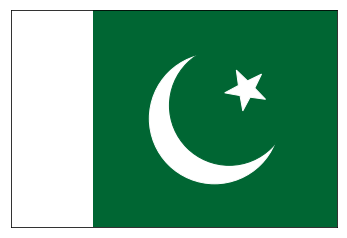

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 14 10:50:11 2019
Makes Pakistan Flag!
@author: Fayyaz Minhas
"""

from matplotlib.patches import Rectangle,Circle, Polygon
import matplotlib.pyplot as plt
import math

class myShape:
    def __init__(self,name):  
        if name is None or type(name)!=type('') or  not name.strip():
            raise ValueError('Shape name cannot be empty!')            
        self.name=name        
    def render(self,ax):
        """
        Add the current object to the figure axes
        """
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
        plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=False) # labels along the bottom edge are off
        ax.add_artist(self)    
    
class myAARectangle(myShape,Rectangle):
    """
    Axis Aligned Rectangle
    """
    def __init__(self,name,xy=(0,0),width=1,height=None,**kwargs):
        if height is None:
            height=width
        myShape.__init__(self,name=name) #calling myShape initializer for setting name properly
        # Note that we pass `self` as an explicit argument in this call.
        Rectangle.__init__(self,xy=xy,width=width,height=height,**kwargs) #Rectangle initializer for drawing
        # Note that we pass `self` as an explicit argument in this call.
        
class myCircle(myShape,Circle):
    def __init__(self,name,xy=(0,0),radius=1,**kwargs):        
        myShape.__init__(self,name=name)        
        Circle.__init__(self,xy=xy,radius=radius,**kwargs)
        
        
def getStarPoints(xy,n,theta,ri,ro):
    dt=2*math.pi/n
    t=theta*math.pi/180.0
    x0,y0=xy
    P=[]
    for i in range(n):
        pout=x0+ro*math.cos(t),y0+ro*math.sin(t)
        pin=x0+ri*math.cos(t+dt/2.0),y0+ri*math.sin(t+dt/2.0)
        t+=dt
        P.extend([pout,pin])
    return P

class myStar(myShape,Polygon):
    def __init__(self,name,xy=(0,0),n=5,theta=45,ri=0.25,ro=0.5,color='r'):    
        myShape.__init__(self,name=name)
        self.edges = n        
        self.theta = theta        
        self.ri = ri
        self.ro = ro
        self.color = color
        P = getStarPoints(xy,self.edges,self.theta,self.ri,self.ro)
        Polygon.__init__(self,P, closed=True,color = color)
    def __repr__(self):
        return self.name + ' : ' + str(self.edges) + ' ' + str(self.color) + ' ' + str(self.loc)
    def move(self,xy):
        P = getStarPoints(xy,self.edges,self.theta,self.ri,self.ro) #calculate the new points based on new xy
        P.append(P[0])
        self.set_xy(P)
        
class myScene:
    def __init__(self,name,contents=[],vport=[0,1,0,1]):
        if name is None or type(name)!=type('') or not name.strip():
            raise ValueError('Scene name cannot be empty!')
        self.name=name
        self.contents=contents
        self.vport=vport
    def show(self,figid=0):
        plt.figure(figid) 
        plt.axis('image')  
        plt.axis(self.vport) 
        ax = plt.gca()
        for s in self.contents:
            s.render(ax)               
        plt.show()
    def __str__(self):
        s=str(self.__class__)+' instance: '+self.name
        s+=' with '+str(len(self.contents))+' objects'
        return s
    def __repr__(self):
        return self.__str__()  

class myCrescent(myShape):
    def __init__(self,name,c0,r0,fcolor,c1,r1,bcolor):
        myShape.__init__(self,name=name)
        self.c1=myCircle(name=name+':c1',xy=c0,radius=r0,color=fcolor)
        self.c2=myCircle(name=name+':c2',xy=c1,radius=r1,color=bcolor)
    def render(self,ax):
        self.c1.render(ax)
        self.c2.render(ax)
        
     
if __name__ == '__main__':
    height=2/3. #overall height
    width=1.0 #overall width
    gwidth=0.75*width #green width
    wwidth=width-gwidth #white width
    rgb_green=(0,0.4,0.2)    
    rg=myAARectangle(name='r-green',xy=[0, 0], width=width, height=height,color=rgb_green)
    rw=myAARectangle(name='r-white',xy=[0, 0], width=wwidth, height=height,color='w')
    cr=myCrescent(name='crescent',c0=(wwidth+gwidth/2.0,height/2.),r0=(3/10.)*height,fcolor='w',c1=(0.67*width,0.56*height), \
                  r1=(11/40.)*height,bcolor=rgb_green)
    x=myStar('star',xy=(0.722*width,0.634*height),ro=0.1*height,ri=0.04*height,color='w')
    flag=myScene(name='flag',contents=[rg,rw,cr,x],vport=[0,width,0,height])
    flag.show()       
   